# EDA

## Things to be done: 
1) Check for outliers in the data, esp the in view column 

2) Test which is the best way to normalise the target variable, [View/Subs] , [View/(Subs*numDays)] , [View/(Subs*numDays+1)] , [View/(Subs*log(numDays+1))] 

3) Check if features like exclaimCount/Hashtag has more views in one category than the other (Perhaps some form of a statistical test)

4) IF EDA can result is more features being generated that would be SUPER useful

## KEY OBSERVATIONS AFTER EDA
After removing outliers in views (using quartile min max method),
1. Seems like DaysPosted not correlated to Views 
2. But if we normalise just using subscribers, target variable is not correlated to views at all, not sure if this is an issue

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Brief look into the dataset
data = pd.read_excel('final_data_folder\Combined\Output.xlsx')
data = data.drop(columns=['Unnamed: 0'])
data['target'] = data['Views']/data['Subscribers']
data.head()

,Channel Name,title,date,thumbnailUrl,Views,Description,Duration,Like,Subscribers,target
0,99Bitcoins,🔴 Experts Predict Bitcoin's Price | This Week ...,2022-03-21 06:00:17,https://i.ytimg.com/vi/gYvtsa4vYyQ/hqdefault.jpg,14635,👉 Donate to Save the Children and 99Bitcoins w...,0:04:45,1011,688000,0.021272
1,99Bitcoins,🔴 US Regulates Bitcoin | This Week in Crypto –...,2022-03-14 06:00:04,https://i.ytimg.com/vi/CNUgKMi8OJk/hqdefault.jpg,17212,📢 Get your NFT domain with no renewal or claim...,0:03:41,1299,688000,0.025017
2,99Bitcoins,🔴 eBay and Airbnb to Accept Crypto??? | This W...,2022-03-07 06:00:01,https://i.ytimg.com/vi/5iDZhce5XxI/hqdefault.jpg,12224,📢 Get a free NFT domain valued at $50 by atten...,0:04:04,872,688000,0.017767
3,99Bitcoins,🔴 Jailtime for Crypto | This Week in Crypto – ...,2022-02-28 06:00:16,https://i.ytimg.com/vi/uw_tV-oLMwQ/hqdefault.jpg,15638,📢 Get your NFT domain with no renewal or claim...,0:03:50,1044,688000,0.022730
4,99Bitcoins,🔴 Buffett Trades Visa for Crypto | This Week i...,2022-02-21 06:00:08,https://i.ytimg.com/vi/RFnvztPiITg/hqdefault.jpg,20351,📢 Get your NFT domain with no renewal or claim...,0:04:26,1274,688000,0.029580


In [4]:
# Check general information of data 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30143 entries, 0 to 30142
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Channel Name  30143 non-null  object        
 1   title         30143 non-null  object        
 2   date          30143 non-null  datetime64[ns]
 3   thumbnailUrl  30143 non-null  object        
 4   Views         30143 non-null  int64         
 5   Description   29901 non-null  object        
 6   Duration      30143 non-null  object        
 7   Like          30143 non-null  int64         
 8   Subscribers   30143 non-null  int64         
 9   target        30143 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 2.3+ MB


In [5]:
# Check for missing values 
data.isnull().sum()

Channel Name      0
title             0
date              0
thumbnailUrl      0
Views             0
Description     242
Duration          0
Like              0
Subscribers       0
target            0
dtype: int64

The variable "Description" is ignored as its not within the scope of our project. 
We will look into "emojis" in greater detail later.

In [6]:
# data['logDaysPosted'] = data['DaysPosted'].apply(lambda x: math.log(x) if x>0 else x) 
# data['target2'] = data['Views']/(data['Subscribers']*data['logDaysPosted'])

# not very useful

<AxesSubplot:>

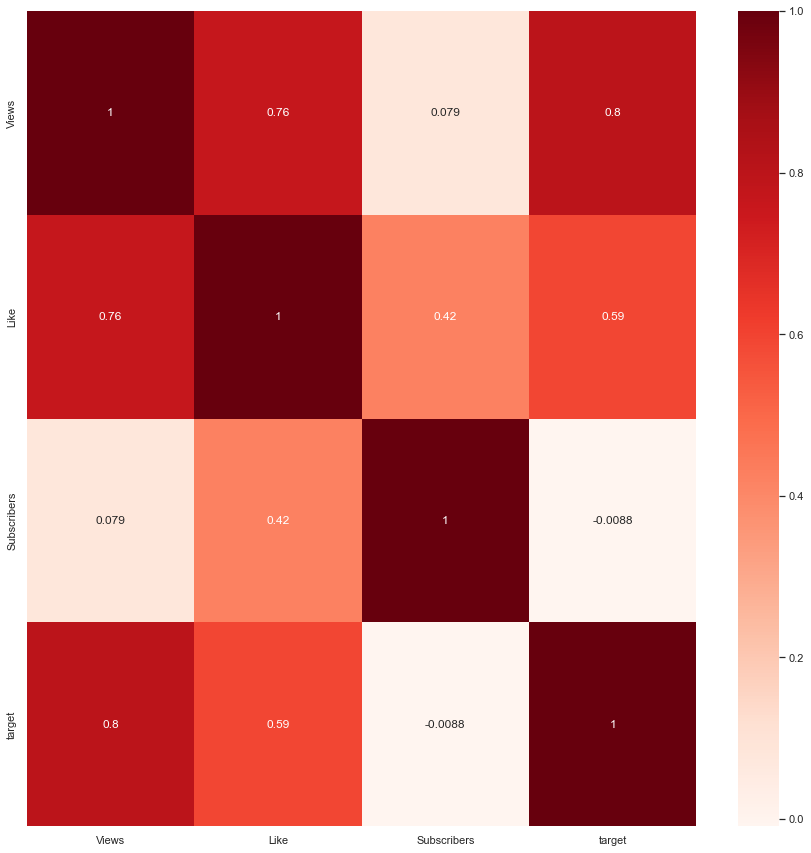

In [7]:
# See initial correlation between the various variables
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cbar=True, annot=True, cmap='Reds')

## Identifying Best Approach in Normalising Target Variable

Text(0, 0.5, 'Views')

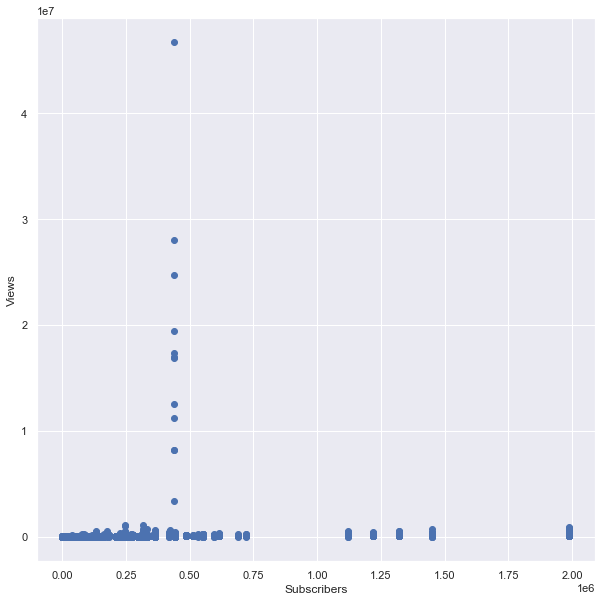

In [8]:
# Check relationship between Views and Subscribers
plt.figure(figsize=(10,10))
plt.scatter(x='Subscribers', y='Views', data=data)
plt.xlabel("Subscribers")
plt.ylabel('Views')

Strong outliers observed for views and subscribers, to be removed. 

In [9]:
# Remove outliers in Views and Days Posted 
# def remove_outlier_IQR(df, column):
#     Q1=df[column].quantile(0.25)
#     Q3=df[column].quantile(0.75)
#     IQR=Q3-Q1
#     df_final=df[~((df[column]<(Q1-1.5*IQR)) | (df[column]>(Q3+1.5*IQR)))]
#     return df_final

In [10]:
def remove_outlier(df, column):
    bot1=df[column].quantile(0.01)
    top1=df[column].quantile(0.99)
    df_final=df[~((df[column]<bot1) | (df[column]>top1))]
    return df_final

In [11]:
data_remove = remove_outlier(data, 'Views')
data_remove = remove_outlier(data_remove, 'Subscribers')

Text(0, 0.5, 'Views')

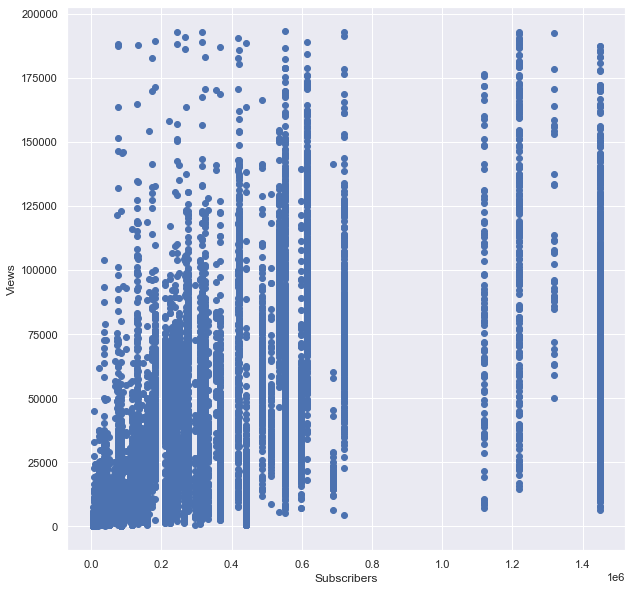

In [12]:
# Check relationship between Views and Subscribers
plt.figure(figsize=(10,10))
plt.scatter(x='Subscribers', y='Views', data=data_remove)
plt.xlabel("Subscribers")
plt.ylabel('Views')

In [13]:
# data_remove['Target'] = data_remove['Views']/(data_remove['Subscribers'])
# data_remove.head()

Text(0.5, 1.0, 'After Removing Outliers')

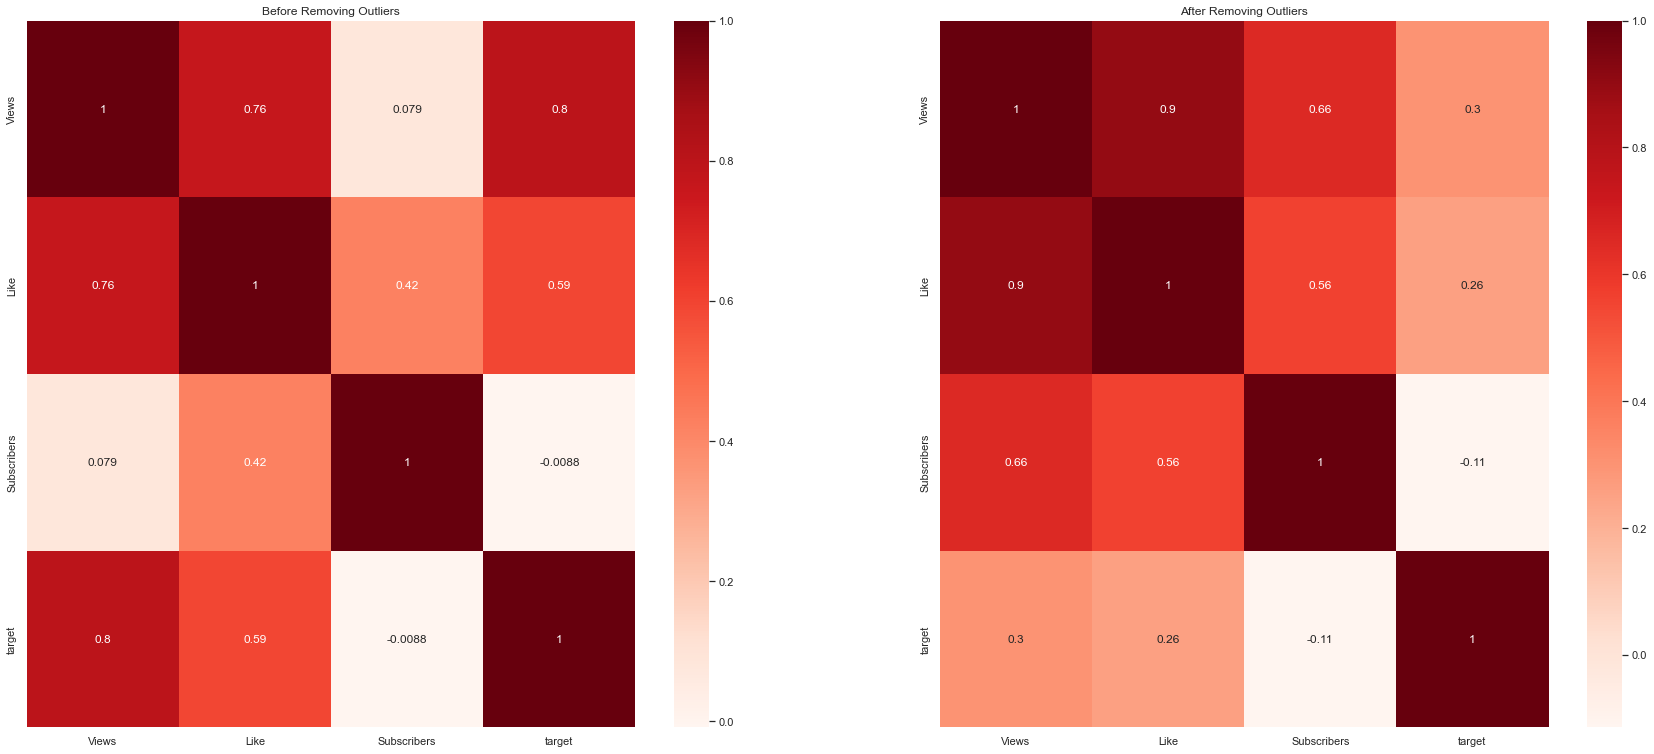

In [14]:
# See correlation between the various variables after removing outliers in views and subscribers
fig, axes = plt.subplots(1, 2, figsize=(30,13))

sns.heatmap(data.corr(), cbar=True, annot=True, cmap='Reds', ax=axes[0])
axes[0].set_title('Before Removing Outliers')

sns.heatmap(data_remove.corr(), cbar=True, annot=True, cmap='Reds', ax=axes[1])
axes[1].set_title('After Removing Outliers')

We will normalise views with subscribers count. 

In [15]:
# Correlation between Views and target variable 
data_remove['Views'].corr(data_remove['target'])

0.30096946134473507

In [16]:
# Correlation between Subscribers and target variable 
data_remove['Subscribers'].corr(data_remove['target'])

-0.11446570883387655